# Here scoring values are processed, visualized, latex tables are created and one compound substructures are visualized

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cv_scores = pd.read_json("cv_scores.json")
cv_scores_conf = pd.read_json("cv_scores_conf.json")

In [3]:
list_of_models = list(cv_scores_conf["model"].value_counts().index)
list_of_models = sorted(list_of_models, key=lambda x: int(x.split(" ")[1]))

In [4]:
cv_scores_table = cv_scores.pivot(index=["algorithm", "scoring_type"], columns="model", values="scoring_value")
cv_scores_conf_table = cv_scores_conf.pivot(index=["algorithm", "scoring_type"], columns="model", values="scoring_value")

In [5]:
cv_scores_table[list_of_models]

model                                             model 1       model 2  \
algorithm           scoring_type                                          
Gradient Boosting   max_error               -1.564569e+02 -1.532614e+02   
                    neg_mean_absolute_error -3.096076e+01 -3.109053e+01   
                    neg_mean_squared_error  -1.734456e+03 -1.748880e+03   
                    r2                       7.587738e-01  7.559921e-01   
Linear Regression   max_error               -7.819156e+13 -1.056198e+07   
                    neg_mean_absolute_error -6.288939e+12 -1.123056e+06   
                    neg_mean_squared_error  -2.367366e+26 -1.151761e+13   
                    r2                      -3.417746e+22 -1.800428e+09   
Linear Regression 1 max_error               -4.031164e+14 -6.078628e+02   
                    neg_mean_absolute_error -4.490499e+12 -4.724956e+01   
                    neg_mean_squared_error  -1.314402e+28 -1.733657e+04   
                    r2                      -1.604941e+24 -1.943463e+00   
Linear Regression 2 max_error                         NaN -2.749773e+02   
                    neg_mean_absolute_error           NaN -5.900525e+01   
                    neg_mean_squared_error            NaN -6.069769e+03   
                    r2                                NaN  1.332529e-01   
Random Forest       max_error               -1.650027e+02 -1.634816e+02   
                    neg_mean_absolute_error -3.006041e+01 -2.994562e+01   
                    neg_mean_squared_error  -1.815230e+03 -1.790169e+03   
                    r2                       7.491970e-01  7.527765e-01   

model                                            model 3       model 4  \
algorithm           scoring_type                                         
Gradient Boosting   max_error                -251.833095 -1.533528e+02   
                    neg_mean_absolute_error   -58.156609 -3.098725e+01   
                    neg_mean_squared_error  -5584.411063 -1.746828e+03   
                    r2                          0.223485  7.568611e-01   
Linear Regression   max_error                -274.977270 -2.370515e+05   
                    neg_mean_absolute_error   -59.005253 -2.060962e+04   
                    neg_mean_squared_error  -6069.768991 -2.556199e+09   
                    r2                          0.133253 -4.091179e+05   
Linear Regression 1 max_error                -274.977270 -6.478036e+02   
                    neg_mean_absolute_error   -59.005253 -4.871819e+01   
                    neg_mean_squared_error  -6069.768991 -1.766431e+04   
                    r2                          0.133253 -1.991326e+00   
Linear Regression 2 max_error                -274.977270 -2.499506e+02   
                    neg_mean_absolute_error   -59.005253 -6.719091e+01   
                    neg_mean_squared_error  -6069.768991 -6.837429e+03   
                    r2                          0.133253  5.762289e-02   
Random Forest       max_error                -241.071683 -1.632738e+02   
                    neg_mean_absolute_error   -53.180188 -3.002299e+01   
                    neg_mean_squared_error  -5047.232445 -1.805039e+03   
                    r2                          0.296414  7.507975e-01   

model                                             model 5       model 6  \
algorithm           scoring_type                                          
Gradient Boosting   max_error               -1.560081e+02 -1.529779e+02   
                    neg_mean_absolute_error -3.114126e+01 -3.157784e+01   
                    neg_mean_squared_error  -1.762229e+03 -1.790235e+03   
                    r2                       7.544006e-01  7.509880e-01   
Linear Regression   max_error               -9.492208e+04 -1.154841e+05   
                    neg_mean_absolute_error -9.744631e+03 -1.292642e+04   
                    neg_mean_squared_error  -4.593941e+08 -1.790707e+09   
                    r2                      -

In [6]:
cv_scores_table.iloc[4,:] = cv_scores_table.iloc[4,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[5,:] = cv_scores_table.iloc[5,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[6,:] = cv_scores_table.iloc[6,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):.0f}")
cv_scores_table.iloc[7,:] = cv_scores_table.iloc[7,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_table.iloc[8,:] = cv_scores_table.iloc[8,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[9,:] = cv_scores_table.iloc[9,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[10,:] = cv_scores_table.iloc[10,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):0.0f}")
cv_scores_table.iloc[11,:] = cv_scores_table.iloc[11,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_table.iloc[12,:] = cv_scores_table.iloc[12,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[13,:] = cv_scores_table.iloc[13,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_table.iloc[14,:] = cv_scores_table.iloc[14,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):.0f}")
cv_scores_table.iloc[15,:] = cv_scores_table.iloc[15,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_table.iloc[:3,:] = cv_scores_table.iloc[:3,:].applymap(lambda x: f"{abs(x):.0f}" if x<-500 else f"{abs(x):.1f}")
cv_scores_table.iloc[16:19,:] = cv_scores_table.iloc[16:19,:].applymap(lambda x: f"{abs(x):.0f}" if x<-500 else f"{abs(x):.1f}")

cv_scores_table.iloc[3,:] = cv_scores_table.iloc[3,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")
cv_scores_table.iloc[-1,:] = cv_scores_table.iloc[-1,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

In [7]:
cv_scores_table[list_of_models]

model                                       model 1 model 2 model 3 model 4  \
algorithm           scoring_type                                              
Gradient Boosting   max_error                 156.5   153.3   251.8   153.4   
                    neg_mean_absolute_error    31.0    31.1    58.2    31.0   
                    neg_mean_squared_error     1734    1749    5584    1747   
                    r2                        0.759   0.756   0.223   0.757   
Linear Regression   max_error                  >500    >500   275.0    >500   
                    neg_mean_absolute_error    >100    >100    59.0    >100   
                    neg_mean_squared_error   >10000  >10000    6070  >10000   
                    r2                          <-1     <-1   0.133     <-1   
Linear Regression 1 max_error                  >500    >500   275.0    >500   
                    neg_mean_absolute_error    >100    47.2    59.0    48.7   
                    neg_mean_squared_error   >10000  >10000    6070  >10000   
                    r2                          <-1     <-1   0.133     <-1   
Linear Regression 2 max_error                   nan   275.0   275.0   250.0   
                    neg_mean_absolute_error     nan    59.0    59.0    67.2   
                    neg_mean_squared_error      nan    6070    6070    6837   
                    r2                          nan   0.133   0.133   0.058   
Random Forest       max_error                 165.0   163.5   241.1   163.3   
                    neg_mean_absolute_error    30.1    29.9    53.2    30.0   
                    neg_mean_squared_error     1815    1790    5047    1805   
                    r2                        0.749   0.753   0.296   0.751   

model                                       model 5 model 6 model 7 model 8  \
algorithm           scoring_type                                              
Gradient Boosting   max_error                 156.0   153.0   152.9   154.7   
                    neg_mean_absolute_error    31.1    31.6    31.3    30.9   
                    neg_mean_squared_error     1762    1790    1774    1745   
                    r2                        0.754   0.751   0.752   0.757   
Linear Regression   max_error                  >500    >500    >500    >500   
                    neg_mean_absolute_error    >100    >100    >100    >100   
                    neg_mean_squared_error   >10000  >10000  >10000  >10000   
                    r2                          <-1     <-1     <-1     <-1   
Linear Regression 1 max_error                  >500    >500    >500    >500   
                    neg_mean_absolute_error    48.6    48.7    49.1    47.9   
                    neg_mean_squared_error   >10000  >10000  >10000  >10000   
                    r2                          <-1     <-1     <-1     <-1   
Linear Regression 2 max_error                 363.5   256.9   253.5   278.1   
                    neg_mean_absolute_error    69.2    68.0    65.9    65.8   
                    neg_mean_squared_error     9055    7042    6724    6775   
                    r2                       -0.307   0.027   0.071   0.062   
Random Forest       max_error                 164.3   164.0   163.4   165.2   
                    neg_mean_absolute_error    30.0    30.1    30.2    30.3   
                    neg_mean_squared_error     1796    1805    1815    1831   
                    r2                        0.752   0.750   0.749   0.747   

model                                       model 9 model 10 model 11  \
algorithm           scoring_type                                        
Gradient Boosting   max_error                 153.2    153.1    158.6   
                    neg_mean_absolute_error    30.9     31.2     31.3   
                    neg_mean_squared_error     1740     1739     1781   
                    r2                        0.757    0.757    0.751   
Linear Regression   max_error                  >500     >500     >500   
           

In [8]:
cv_scores_conf_table[list_of_models]

model                                             model 1       model 2  \
algorithm           scoring_type                                          
Gradient Boosting   max_error               -1.181877e+02 -1.179280e+02   
                    neg_mean_absolute_error -2.735397e+01 -2.739274e+01   
                    neg_mean_squared_error  -1.372907e+03 -1.369706e+03   
                    r2                       7.822430e-01  7.833687e-01   
Linear Regression   max_error               -4.096322e+10 -1.151014e+04   
                    neg_mean_absolute_error -3.229556e+09 -1.120552e+03   
                    neg_mean_squared_error  -1.863424e+20 -6.871194e+06   
                    r2                      -2.743894e+16 -1.036363e+03   
Linear Regression 1 max_error               -9.970895e+08 -5.051842e+02   
                    neg_mean_absolute_error -2.181415e+07 -5.153862e+01   
                    neg_mean_squared_error  -6.136557e+16 -1.203820e+04   
                    r2                      -9.288349e+12 -9.372812e-01   
Linear Regression 2 max_error                         NaN -1.878388e+02   
                    neg_mean_absolute_error           NaN -5.764329e+01   
                    neg_mean_squared_error            NaN -5.042186e+03   
                    r2                                NaN  2.148158e-01   
Random Forest       max_error               -1.277091e+02 -1.292148e+02   
                    neg_mean_absolute_error -2.725170e+01 -2.757963e+01   
                    neg_mean_squared_error  -1.425397e+03 -1.460743e+03   
                    r2                       7.734394e-01  7.678722e-01   

model                                            model 3       model 4  \
algorithm           scoring_type                                         
Gradient Boosting   max_error                -187.068529 -1.187996e+02   
                    neg_mean_absolute_error   -54.548795 -2.787181e+01   
                    neg_mean_squared_error  -4741.397701 -1.401580e+03   
                    r2                          0.254621  7.780944e-01   
Linear Regression   max_error                -187.838819 -1.021548e+04   
                    neg_mean_absolute_error   -57.643293 -1.262665e+03   
                    neg_mean_squared_error  -5042.185821 -6.318955e+06   
                    r2                          0.214816 -1.034614e+03   
Linear Regression 1 max_error                -187.838819 -4.698775e+02   
                    neg_mean_absolute_error   -57.643293 -4.882646e+01   
                    neg_mean_squared_error  -5042.185821 -1.023185e+04   
                    r2                          0.214816 -6.806932e-01   
Linear Regression 2 max_error                -187.838819 -2.235136e+02   
                    neg_mean_absolute_error   -57.643293 -6.405390e+01   
                    neg_mean_squared_error  -5042.185821 -6.419496e+03   
                    r2                          0.214816  1.096753e-02   
Random Forest       max_error                -179.005561 -1.269908e+02   
                    neg_mean_absolute_error   -52.325428 -2.768830e+01   
                    neg_mean_squared_error  -4516.973993 -1.451844e+03   
                    r2                          0.290705  7.697362e-01   

model                                             model 5       model 6  \
algorithm           scoring_type                                          
Gradient Boosting   max_error               -1.187938e+02 -1.172009e+02   
                    neg_mean_absolute_error -2.729141e+01 -2.771968e+01   
                    neg_mean_squared_error  -1.382671e+03 -1.390684e+03   
                    r2                       7.800089e-01  7.790964e-01   
Linear Regression   max_error               -1.430326e+04 -7.635446e+03   
                    neg_mean_absolute_error -1.272229e+03 -1.093277e+03   
                    neg_mean_squared_error  -1.068473e+07 -3.970933e+06   
                    r2                      -

In [9]:
cv_scores_conf_table.iloc[4,:] = cv_scores_conf_table.iloc[4,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[5,:] = cv_scores_conf_table.iloc[5,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[6,:] = cv_scores_conf_table.iloc[6,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):.0f}")
cv_scores_conf_table.iloc[7,:] = cv_scores_conf_table.iloc[7,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_conf_table.iloc[8,:] = cv_scores_conf_table.iloc[8,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[9,:] = cv_scores_conf_table.iloc[9,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[10,:] = cv_scores_conf_table.iloc[10,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):.0f}")
cv_scores_conf_table.iloc[11,:] = cv_scores_conf_table.iloc[11,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_conf_table.iloc[12,:] = cv_scores_conf_table.iloc[12,:].apply(lambda x: ">500" if float(x)<-500 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[13,:] = cv_scores_conf_table.iloc[13,:].apply(lambda x: ">100" if float(x)<-100 else f"{abs(float(x)):0.1f}")
cv_scores_conf_table.iloc[14,:] = cv_scores_conf_table.iloc[14,:].apply(lambda x: ">10000" if float(x)<-10000 else f"{abs(float(x)):.0f}")
cv_scores_conf_table.iloc[15,:] = cv_scores_conf_table.iloc[15,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

cv_scores_conf_table.iloc[:3,:] = cv_scores_conf_table.iloc[:3,:].applymap(lambda x: f"{abs(x):.0f}" if x<-500 else f"{abs(x):.1f}")
cv_scores_conf_table.iloc[16:19,:] = cv_scores_conf_table.iloc[16:19,:].applymap(lambda x: f"{abs(x):.0f}" if x<-500 else f"{abs(x):.1f}")

cv_scores_conf_table.iloc[3,:] = cv_scores_conf_table.iloc[3,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")
cv_scores_conf_table.iloc[-1,:] = cv_scores_conf_table.iloc[-1,:].apply(lambda x: "<-1" if float(x)<-1 else ">1" if float(x)>1 else f"{float(x):0.3f}")

In [10]:
cv_scores_conf_table[list_of_models]

model                                       model 1 model 2 model 3 model 4  \
algorithm           scoring_type                                              
Gradient Boosting   max_error                 118.2   117.9   187.1   118.8   
                    neg_mean_absolute_error    27.4    27.4    54.5    27.9   
                    neg_mean_squared_error     1373    1370    4741    1402   
                    r2                        0.782   0.783   0.255   0.778   
Linear Regression   max_error                  >500    >500   187.8    >500   
                    neg_mean_absolute_error    >100    >100    57.6    >100   
                    neg_mean_squared_error   >10000  >10000    5042  >10000   
                    r2                          <-1     <-1   0.215     <-1   
Linear Regression 1 max_error                  >500    >500   187.8   469.9   
                    neg_mean_absolute_error    >100    51.5    57.6    48.8   
                    neg_mean_squared_error   >10000  >10000    5042  >10000   
                    r2                          <-1  -0.937   0.215  -0.681   
Linear Regression 2 max_error                   nan   187.8   187.8   223.5   
                    neg_mean_absolute_error     nan    57.6    57.6    64.1   
                    neg_mean_squared_error      nan    5042    5042    6419   
                    r2                          nan   0.215   0.215   0.011   
Random Forest       max_error                 127.7   129.2   179.0   127.0   
                    neg_mean_absolute_error    27.3    27.6    52.3    27.7   
                    neg_mean_squared_error     1425    1461    4517    1452   
                    r2                        0.773   0.768   0.291   0.770   

model                                       model 5 model 6 model 7 model 8  \
algorithm           scoring_type                                              
Gradient Boosting   max_error                 118.8   117.2   120.3   116.5   
                    neg_mean_absolute_error    27.3    27.7    27.6    27.5   
                    neg_mean_squared_error     1383    1391    1397    1358   
                    r2                        0.780   0.779   0.778   0.784   
Linear Regression   max_error                  >500    >500    >500    >500   
                    neg_mean_absolute_error    >100    >100    >100    >100   
                    neg_mean_squared_error   >10000  >10000  >10000  >10000   
                    r2                          <-1     <-1     <-1     <-1   
Linear Regression 1 max_error                 494.8   460.7   346.7   396.6   
                    neg_mean_absolute_error    48.9    48.9    47.1    47.5   
                    neg_mean_squared_error   >10000    9551    6727    7994   
                    r2                       -0.908  -0.536  -0.070  -0.293   
Linear Regression 2 max_error                 298.4   197.9   198.5   191.2   
                    neg_mean_absolute_error    67.8    63.5    61.7    61.0   
                    neg_mean_squared_error     9253    5980    5748    5554   
                    r2                       -0.373   0.070   0.107   0.135   
Random Forest       max_error                 127.2   126.5   126.9   127.6   
                    neg_mean_absolute_error    27.3    27.6    27.6    27.9   
                    neg_mean_squared_error     1425    1436    1458    1476   
                    r2                        0.773   0.772   0.768   0.766   

model                                       model 9 model 10 model 11  \
algorithm           scoring_type                                        
Gradient Boosting   max_error                 117.1    126.0    123.5   
                    neg_mean_absolute_error    27.8     27.7     27.6   
                    neg_mean_squared_error     1389     1437     1409   
                    r2                        0.779    0.772    0.776   
Linear Regression   max_error                  >500     >500     >500   
           

In [11]:
indexes1 = list(filter(lambda x: x[0] in ["Gradient Boosting", "Random Forest"], list(cv_scores_conf_table.index)))
indexes2 = list(filter(lambda x: x[0] in ["Linear Regression 1", "Linear Regression 2"], list(cv_scores_conf_table.index)))

In [12]:
indexes1, indexes2

([('Gradient Boosting', 'max_error'),
  ('Gradient Boosting', 'neg_mean_absolute_error'),
  ('Gradient Boosting', 'neg_mean_squared_error'),
  ('Gradient Boosting', 'r2'),
  ('Random Forest', 'max_error'),
  ('Random Forest', 'neg_mean_absolute_error'),
  ('Random Forest', 'neg_mean_squared_error'),
  ('Random Forest', 'r2')],
 [('Linear Regression 1', 'max_error'),
  ('Linear Regression 1', 'neg_mean_absolute_error'),
  ('Linear Regression 1', 'neg_mean_squared_error'),
  ('Linear Regression 1', 'r2'),
  ('Linear Regression 2', 'max_error'),
  ('Linear Regression 2', 'neg_mean_absolute_error'),
  ('Linear Regression 2', 'neg_mean_squared_error'),
  ('Linear Regression 2', 'r2')])

In [31]:
indexes1_2 = list(filter(lambda x: x[0] in ["Gradient Boosting", "Random Forest"] and x[1] == "max_error", list(cv_scores_conf_table.index)))

In [32]:
cv_scores_table.loc[indexes1_2, list_of_models].applymap(float).diff()

,model,model 1,model 2,model 3,model 4,model 5,model 6,model 7,model 8,model 9,model 10,model 11,model 12,model 13,model 14
algorithm,scoring_type,,,,,,,,,,,,,,
Gradient Boosting,max_error,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Random Forest,max_error,8.5,10.2,-10.7,9.9,8.3,11.0,10.5,10.5,12.8,12.4,7.2,13.9,8.3,4.6


In [33]:
(cv_scores_table.loc[indexes1_2, list_of_models].applymap(float) - cv_scores_conf_table.loc[indexes1_2, list_of_models].applymap(float)).T

algorithm,Gradient Boosting,Random Forest
scoring_type,max_error,max_error
model,,
model 1,38.3,37.3
model 2,35.4,34.3
model 3,64.7,62.1
model 4,34.6,36.3
model 5,37.2,37.1
model 6,35.8,37.5
model 7,32.6,36.5
model 8,38.2,37.6


# database 1 scores

In [13]:
temp_df = cv_scores_table.loc[indexes1, list_of_models][list_of_models].T
temp_df.index = range(1, 15)
print(temp_df.to_latex())

\begin{tabular}{lllllllll}
\toprule
algorithm & \multicolumn{4}{l}{Gradient Boosting} & \multicolumn{4}{l}{Random Forest} \\
scoring\_type &         max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &     r2 &     max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &     r2 \\
\midrule
1  &             156.5 &                    31.0 &                   1734 &  0.759 &         165.0 &                    30.1 &                   1815 &  0.749 \\
2  &             153.3 &                    31.1 &                   1749 &  0.756 &         163.5 &                    29.9 &                   1790 &  0.753 \\
3  &             251.8 &                    58.2 &                   5584 &  0.223 &         241.1 &                    53.2 &                   5047 &  0.296 \\
4  &             153.4 &                    31.0 &                   1747 &  0.757 &         163.3 &                    30.0 &                   1805 &  0.751 \\
5  &             156.0 &       

In [14]:
temp_df = cv_scores_table.loc[indexes2, list_of_models][list_of_models].T
temp_df.index = range(1, 15)

In [15]:
print(temp_df.to_latex())

\begin{tabular}{lllllllll}
\toprule
algorithm & \multicolumn{4}{l}{Linear Regression 1} & \multicolumn{4}{l}{Linear Regression 2} \\
scoring\_type &           max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &      r2 &           max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &      r2 \\
\midrule
1  &                >500 &                    >100 &                 >10000 &     <-1 &                 nan &                     nan &                    nan &     nan \\
2  &                >500 &                    47.2 &                 >10000 &     <-1 &               275.0 &                    59.0 &                   6070 &   0.133 \\
3  &               275.0 &                    59.0 &                   6070 &   0.133 &               275.0 &                    59.0 &                   6070 &   0.133 \\
4  &                >500 &                    48.7 &                 >10000 &     <-1 &               250.0 &                    67.2 &          

# database 2 scores

In [16]:
temp_df = cv_scores_conf_table.loc[indexes1, list_of_models][list_of_models].T
temp_df.index = range(1, 15)
print(temp_df.to_latex())

\begin{tabular}{lllllllll}
\toprule
algorithm & \multicolumn{4}{l}{Gradient Boosting} & \multicolumn{4}{l}{Random Forest} \\
scoring\_type &         max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &     r2 &     max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &     r2 \\
\midrule
1  &             118.2 &                    27.4 &                   1373 &  0.782 &         127.7 &                    27.3 &                   1425 &  0.773 \\
2  &             117.9 &                    27.4 &                   1370 &  0.783 &         129.2 &                    27.6 &                   1461 &  0.768 \\
3  &             187.1 &                    54.5 &                   4741 &  0.255 &         179.0 &                    52.3 &                   4517 &  0.291 \\
4  &             118.8 &                    27.9 &                   1402 &  0.778 &         127.0 &                    27.7 &                   1452 &  0.770 \\
5  &             118.8 &       

In [17]:
temp_df = cv_scores_conf_table.loc[indexes2, list_of_models][list_of_models].T
temp_df.index = range(1, 15)

In [18]:
print(temp_df.to_latex())

\begin{tabular}{lllllllll}
\toprule
algorithm & \multicolumn{4}{l}{Linear Regression 1} & \multicolumn{4}{l}{Linear Regression 2} \\
scoring\_type &           max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &      r2 &           max\_error & neg\_mean\_absolute\_error & neg\_mean\_squared\_error &      r2 \\
\midrule
1  &                >500 &                    >100 &                 >10000 &     <-1 &                 nan &                     nan &                    nan &     nan \\
2  &                >500 &                    51.5 &                 >10000 &  -0.937 &               187.8 &                    57.6 &                   5042 &   0.215 \\
3  &               187.8 &                    57.6 &                   5042 &   0.215 &               187.8 &                    57.6 &                   5042 &   0.215 \\
4  &               469.9 &                    48.8 &                 >10000 &  -0.681 &               223.5 &                    64.1 &          

<ipython-input-49-0fe377648e35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfr_gbr["dataset"] = "dataset 1"
<ipython-input-49-0fe377648e35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfr_gbr_conf["dataset"] = "dataset 2"
C:\Users\BF\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

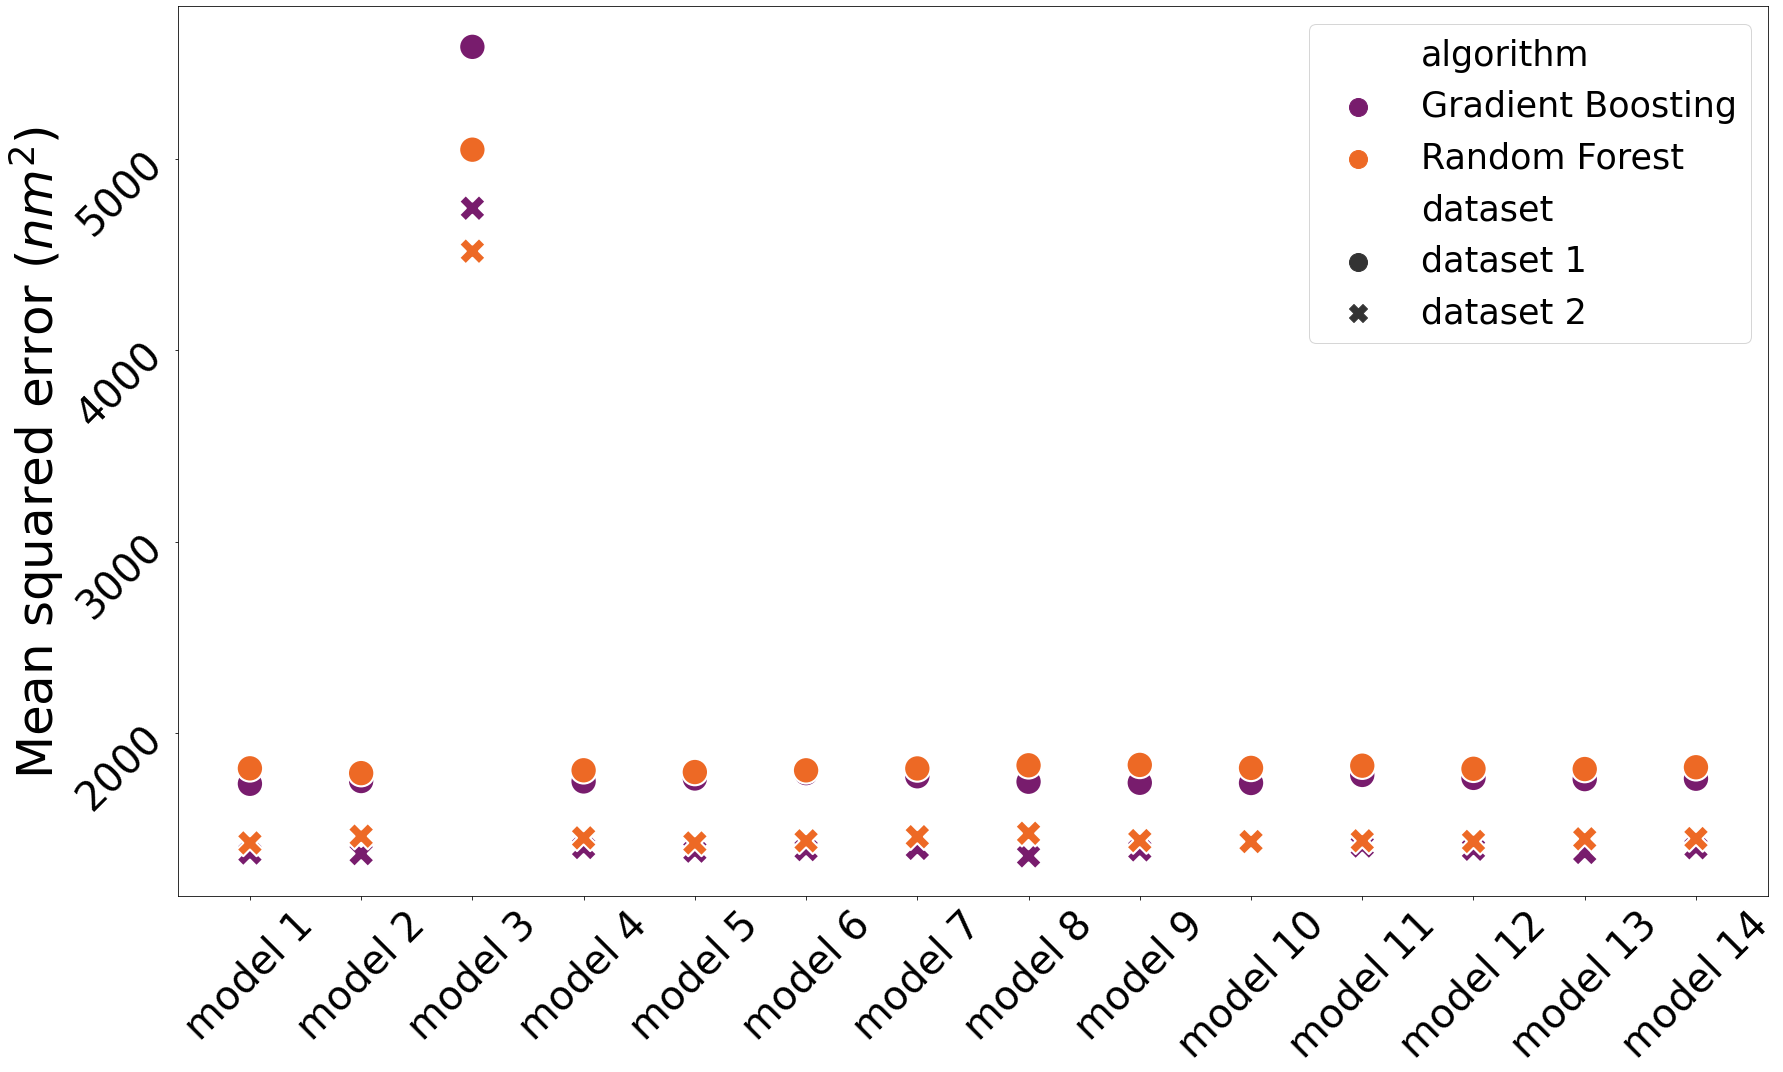

In [49]:
rfr_gbr = cv_scores[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
rfr_gbr["dataset"] = "dataset 1"
rfr_gbr_conf = cv_scores_conf[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
rfr_gbr_conf["dataset"] = "dataset 2"
rfr_gbr_app = pd.concat((rfr_gbr, rfr_gbr_conf), ignore_index=True)

dat = rfr_gbr_app[rfr_gbr_app["scoring_type"]=="neg_mean_squared_error"]
dat.loc[:, "scoring_value"] = dat.loc[:, "scoring_value"].apply(abs)
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x="model", y="scoring_value", data=dat, hue="algorithm",style="dataset", ax=ax, s=700, palette="inferno")
ax.set_xlabel(None)
ax.set_ylabel(r"Mean squared error ($ nm^2 $)", fontsize=50)
ax.tick_params(labelsize=40, rotation=45)
ax.legend(fontsize=35, markerscale=3.0)
plt.tight_layout()

In [50]:
fig.savefig("MSEs.pdf")

C:\Users\BF\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
<ipython-input-51-b63ecac332ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat["alg_dataset"] = np.NaN
<ipython-input-51-b63ecac332ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

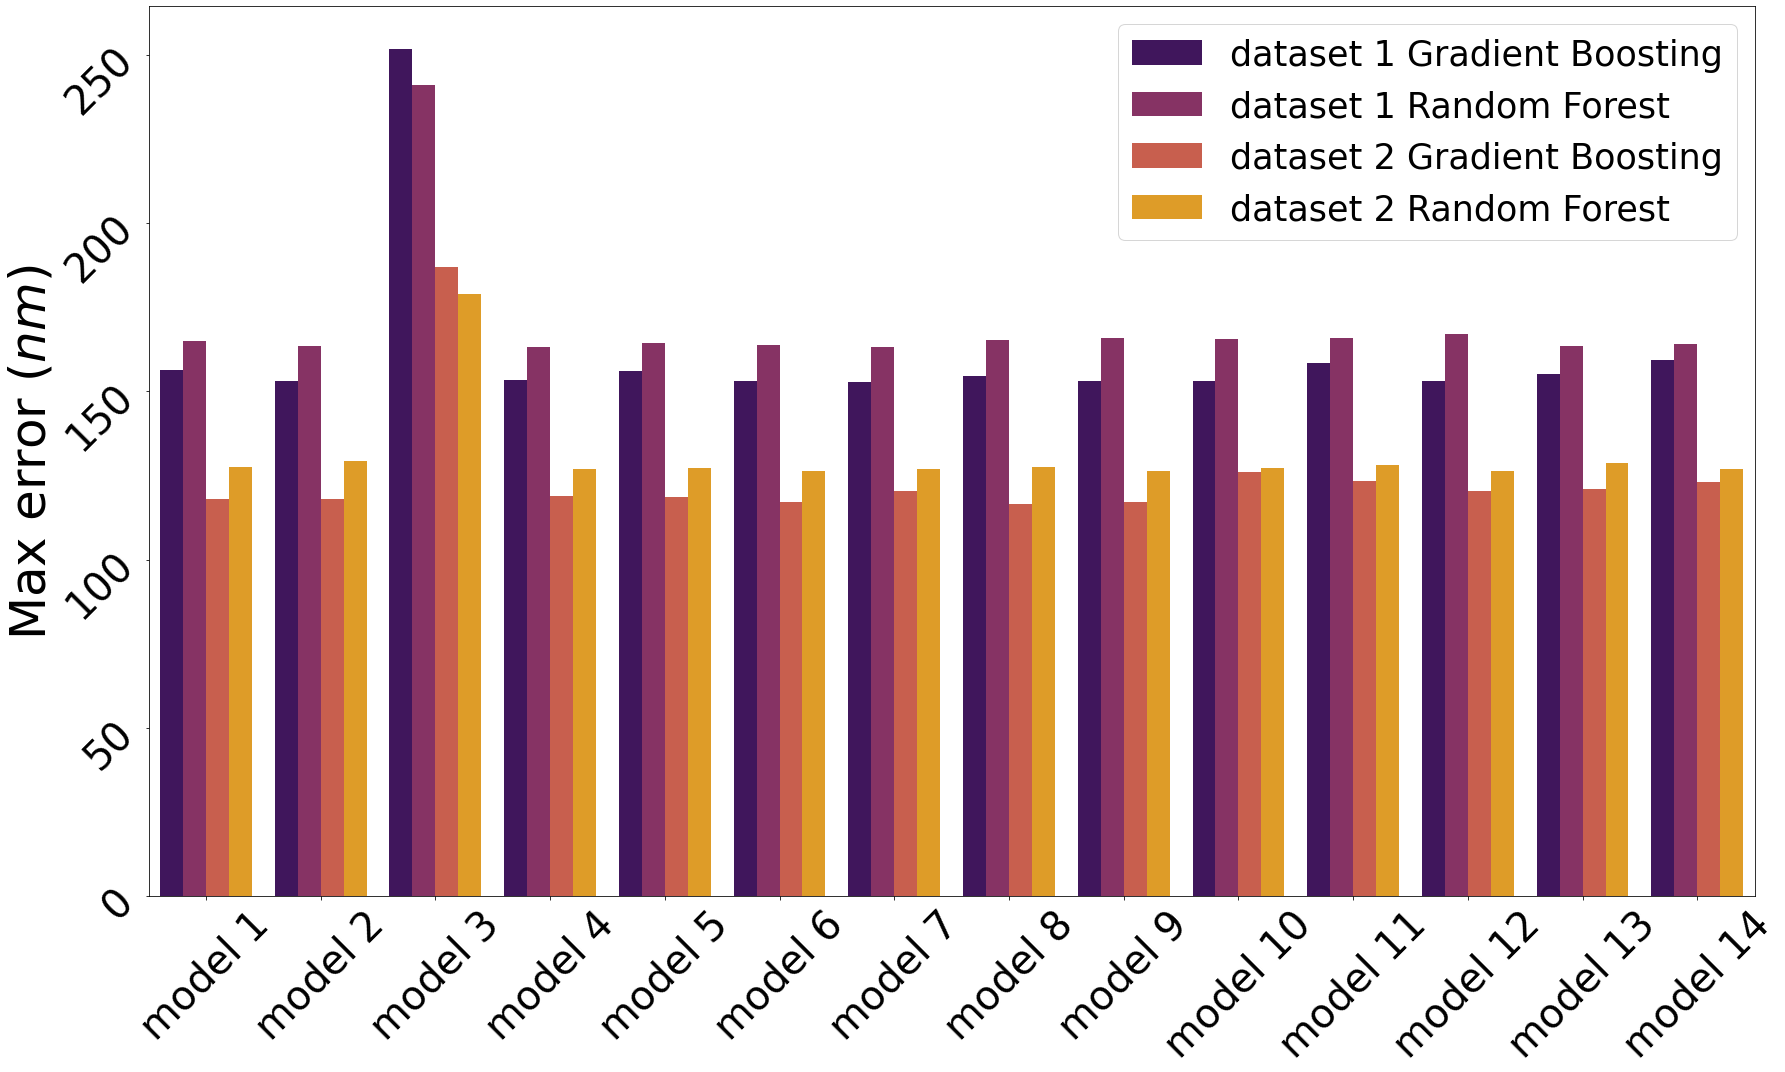

In [51]:
# rfr_gbr = cv_scores[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
dat = rfr_gbr_app[rfr_gbr_app["scoring_type"]=="max_error"]
dat.loc[:, "scoring_value"] = dat.loc[:, "scoring_value"].apply(abs)
dat["alg_dataset"] = np.NaN
for i, row in dat.iterrows():
    dat["alg_dataset"][i] = " ".join([row["dataset"], row["algorithm"]])
fig, ax = plt.subplots(figsize=(25,15))
sns.barplot(x="model", y="scoring_value", hue="alg_dataset", data=dat, ax=ax, order=list_of_models, palette="inferno")
# ax.set_title("Standard deviation of error")
ax.set_xlabel(None)
ax.set_ylabel("Max error ($nm$)", fontsize=50)
ax.tick_params(labelsize=40, rotation=45)
ax.legend(prop={"size": 35})
plt.tight_layout()
# extent = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

In [52]:
fig.savefig("MEs.pdf")

C:\Users\BF\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


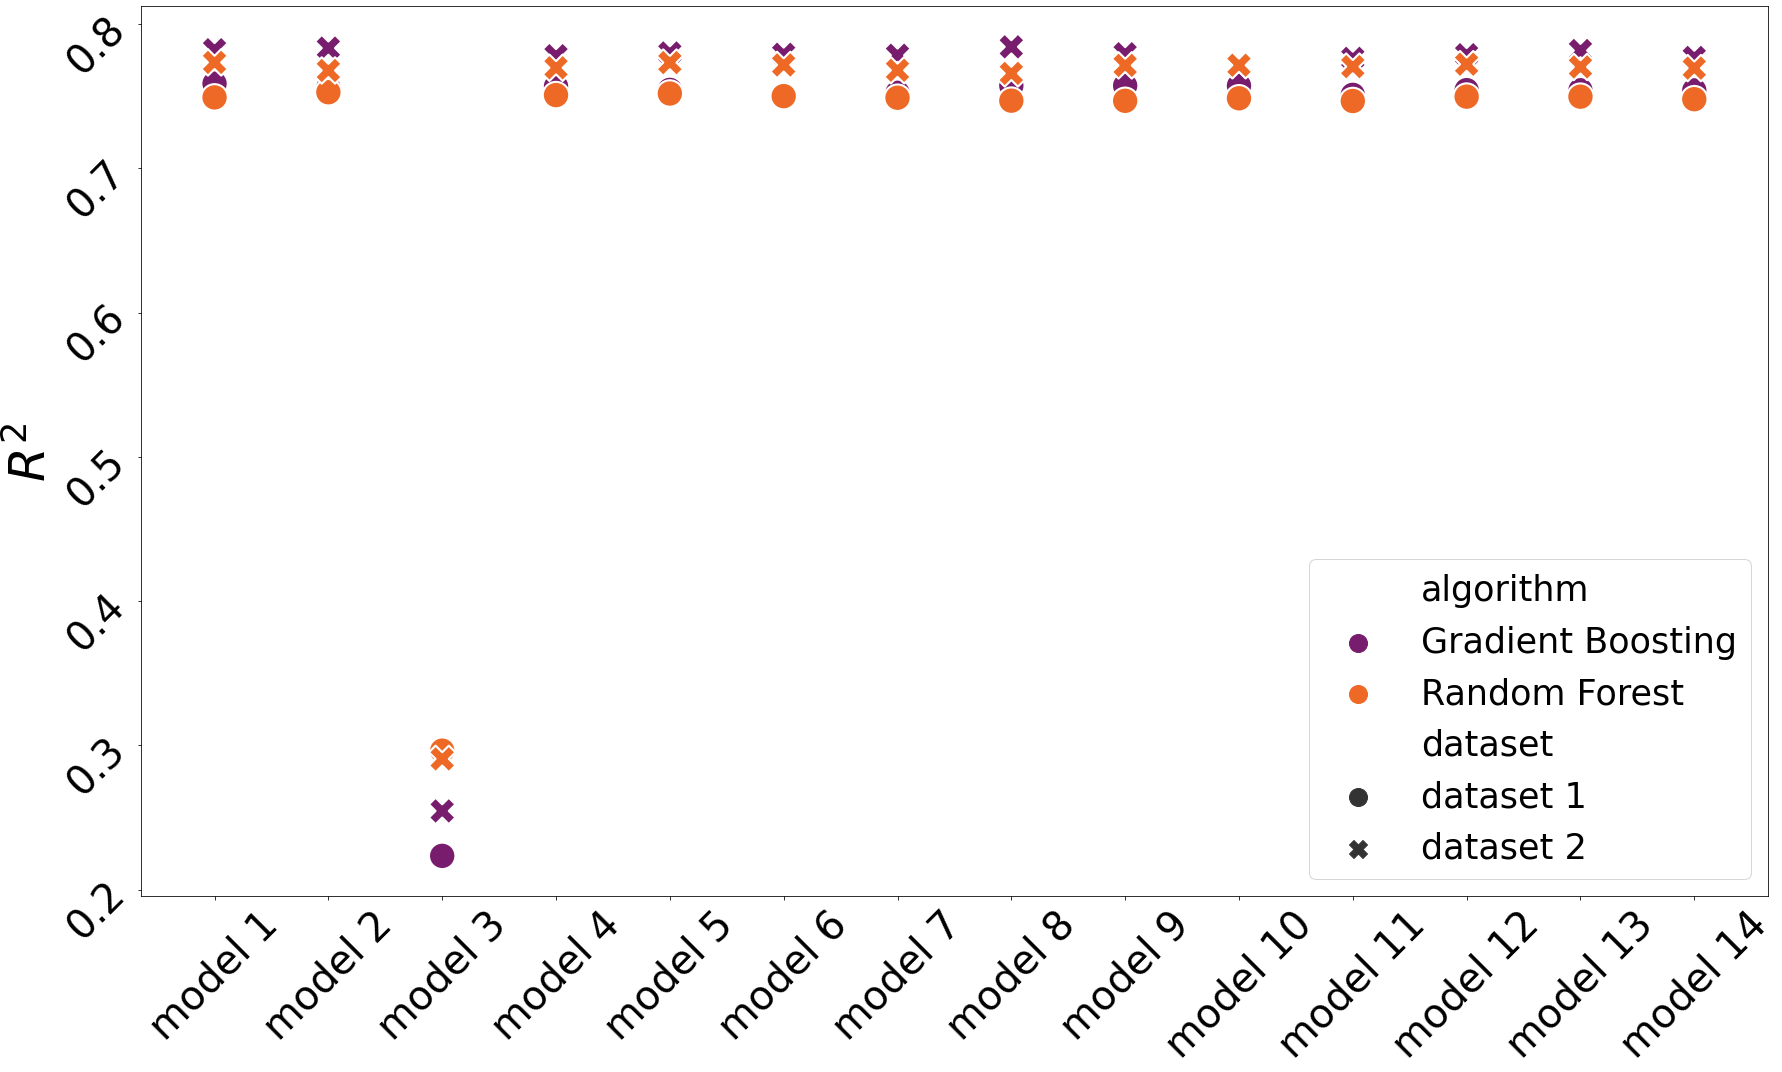

In [53]:
# rfr_gbr = cv_scores[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
dat = rfr_gbr_app[rfr_gbr_app["scoring_type"]=="r2"]
dat.loc[:, "scoring_value"] = dat.loc[:, "scoring_value"].apply(abs)
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x="model", y="scoring_value", data=dat, style="dataset", hue="algorithm", ax=ax, s=700, palette="inferno")
ax.set_xlabel(None)
ax.set_ylabel(r"$ R^2 $", fontsize=50)
ax.tick_params(labelsize=40, rotation=45)
ax.legend(fontsize=35, markerscale=3.0)
# ax.legend(prop={"size": 35})
plt.tight_layout()

In [54]:
fig.savefig("r2.pdf")

<ipython-input-55-416f001d975b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfr_gbr["dataset"] = "dataset 1"
<ipython-input-55-416f001d975b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfr_gbr_conf["dataset"] = "dataset 2"
C:\Users\BF\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

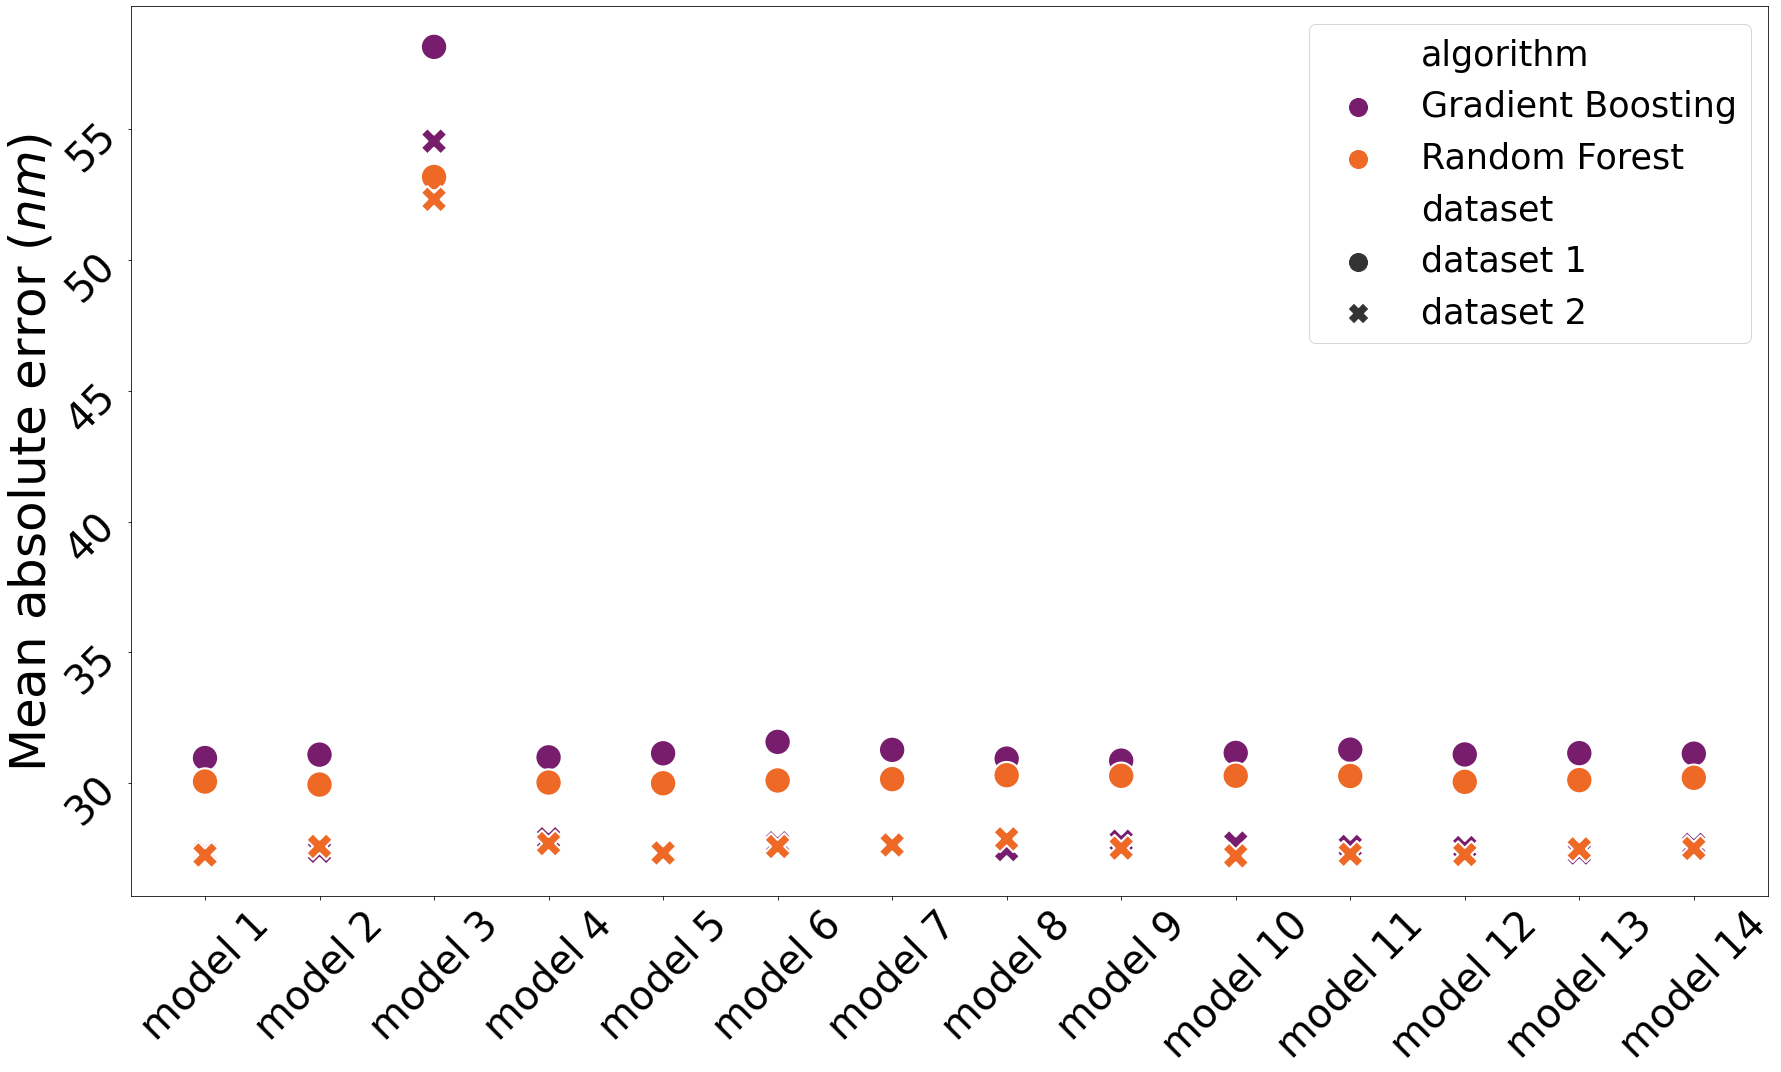

In [55]:
rfr_gbr = cv_scores[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
rfr_gbr["dataset"] = "dataset 1"
rfr_gbr_conf = cv_scores_conf[cv_scores["algorithm"].isin(["Random Forest", "Gradient Boosting"])]
rfr_gbr_conf["dataset"] = "dataset 2"
rfr_gbr_app = pd.concat((rfr_gbr, rfr_gbr_conf), ignore_index=True)

dat = rfr_gbr_app[rfr_gbr_app["scoring_type"]=="neg_mean_absolute_error"]
dat.loc[:, "scoring_value"] = dat.loc[:, "scoring_value"].apply(abs)
fig, ax = plt.subplots(figsize=(25,15))
sns.scatterplot(x="model", y="scoring_value", data=dat, hue="algorithm",style="dataset", ax=ax, s=700, palette="inferno")
ax.set_xlabel(None)
ax.set_ylabel("Mean absolute error ($ nm $)", fontsize=50)
ax.tick_params(labelsize=40, rotation=45)
ax.legend(fontsize=35, markerscale=3.0)
plt.tight_layout()

In [56]:
fig.savefig("MAEs.pdf")

In [24]:
from rdkit import Chem
from rdkit.Chem import Draw

RDKit WARNING: [09:51:44] Enabling RDKit 2019.09.1 jupyter extensions


In [25]:
def smilsToImage(smils: str):
    smilsChromoChem = Chem.MolFromSmiles(smils)
    drawing = Draw.MolToImage(smilsChromoChem, size=(250,250))
    return drawing


In [26]:
only_solids = pd.read_json("only_solids_features.json").reset_index(drop=True)

In [27]:
qm9_database = pd.read_csv("qm9.csv")

In [28]:
chromophore = only_solids["Chromophore"][0]
qm9_smiles = [qm9_database["smiles"][i] for i in only_solids["qm9_pattern_indexes"][0]]

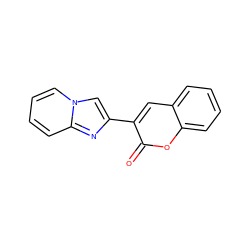

In [29]:
smilsToImage(chromophore)

In [33]:
Draw.MolToFile(Chem.MolFromSmiles(chromophore), fileName="molecule.svg", imageType="svg")

In [ ]:
Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in qm9_smiles], molsPerRow=4)

In [34]:
with open("grid.svg", "w") as f:
    f.write(Draw.MolsToGridImage([Chem.MolFromSmiles(x) for x in qm9_smiles], molsPerRow=4, useSVG=True).data)